## 第一章 绪言
+ 主要内容：
    + 阅读笔记。
    + Python相关代码。

### 1. 阅读笔记
+ 一些基本概念：
    + 数字图像：一个二维函数$f(x, y)$，其中定义x和y为空间坐标，当$x, y, f(x, y)$都是有限的离散值，则就是数字图像。
    + 亮度（灰度）：函数$f$在任意坐标$(x, y)$处的幅度（取值）。
    + 图片元素、图像元素、像素：组成数字图像的元素。
    + 图像分析（图像理解）
    + 计算机视觉：模仿人类视觉，最高级。
    + 图像处理：狭义定义，输入输出都是图像的学科。
        + 低级处理：原始操作，如降低噪声、对比度、图像尖锐化，输入输出都是图像。
        + 中级处理：分割任务，把图像分为区域或目标，然后对这些目标进行描述，转换为适合计算机处理的形式。
        + 高级处理：与人视觉相关的感知函数，对识别的对象进行总体确认。
+ 数字图像表示：
    + 灰度级：单色图像的亮度。
    + 采样：将坐标值数字化。
    + 量化：将幅值数字化。
+ matlab相关函数：
    + 读取图片：`imread`
    + 显示图片：`imshow`
    + 存储图片：`imwrite`
    + 图像类型：
        + 灰度级图像（Gray-scale images）：感觉意思就是单色图像。
        + 二值图像（Binary images）：只有0和1。
        + 索引图像（Indexed images）
        + RGB图像（RGB images）
    + 图像类型转换：`mat2gray`
    + 向量化：`meshgrid`

### 2. Python代码
+ 主要内容包括：
    + `cv2.imread`
    + `cv2.imshow`
    + `cv2.imwrite`
    + 例1-1：生成一张图片 $f(x, y) = A\sin(u_0x + v_0y)$

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# 使用opencv读取图片
# 读取格式为(h, w, c)的BGR图片，数据范围在[0, 255]之间
# 选项 IMREAD_UNCHANGED （按照图片本身获取）, IMREAD_COLOR（加载彩色图片，忽略透明度，默认选项）, IMREAD_GRAYSCALE（灰度图，shape为(h, w)）
# 若读取图片失败（图片不存在、损坏等），不会报错，返回None数据
img = cv2.imread('./data/original_images/ch01/Fig0101.tif', cv2.IMREAD_UNCHANGED)

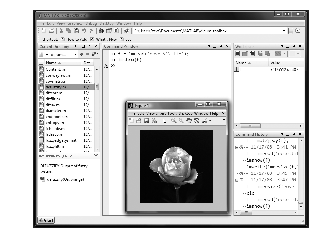

In [3]:
# 展示图片
# cmap是colormap的缩写，具体类型可以参考 https://matplotlib.org/examples/color/colormaps_reference.html
plt.figure()
plt.imshow(img, cmap=plt.cm.gray)  # 注意，如果原始图像是灰度图，则需要设置cmap属性
plt.axis('off')  # 去除坐标轴
plt.show()

In [4]:
# 保存图片
# imwrite 还存在参数 params，可以对不同图片类型指定不同参数
#         参数名称都以`cv2.IMWRITE`开头，后续跟上对应的格式类型，再指定参数，形式为(paramId_1, paramValue_1, paramId_2, paramValue_2, ... )
# 举例：可以通过 cv2.IMWRITE_JPEG_QUALITY 来指定JPEG图片的质量，通过 cv2.IMWRITE_PNG_COMPRESSION 指定PNG图片的压缩等级等
# 返回值为 True 或 False
cv2.imwrite('./data/original_images/ch01/test.tif', img)

True

In [5]:
# 例 1-1：非向量化解法
def twodsin1(A, u0, v0, M, N):
    img = np.zeros([M, N], dtype=np.float32)
    for i in range(M):
        for j in range(N):
            img[i, j] = A * math.sin(u0 * i + v0 * j)
    return img

# 例 1-1：向量化写法
def twodsin2(A, u0, v0, M, N):
    r = np.arange(M)
    c = np.arange(N)
    C, R = np.meshgrid(r, c)
    img = A * np.sin(u0*R + v0*C)
    return img

In [6]:
img1 = twodsin1(1, 1/(4*math.pi), 1/(4*math.pi), 512, 512)
img2 = twodsin2(1, 1/(4*math.pi), 1/(4*math.pi), 512, 512)

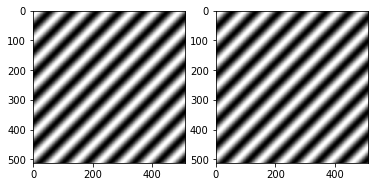

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.imshow(img1, cmap='gray')
ax2 = fig.add_subplot(122)
plt.imshow(img2, cmap='gray')
plt.show()